In [1]:
#https://github.com/codebasics/py/blob/master/ML/13_kmeans/13_kmeans_tutorial.ipynb

In [4]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt


In [5]:
df=pd.read_csv(r"C:\Users\adity\OneDrive\Desktop\ML\K-mean income.csv")

In [6]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


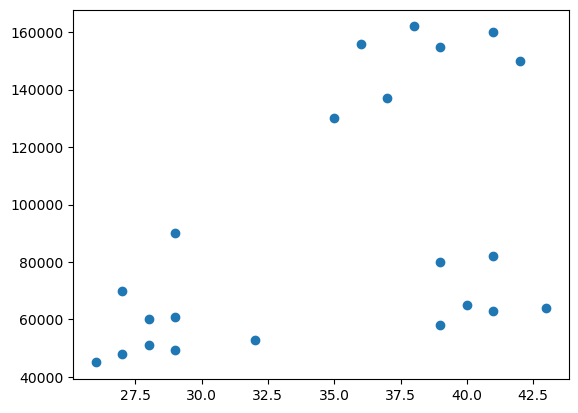

In [7]:
plt.scatter(df.Age,df['Income($)'])

In [8]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [10]:
y_predicted=km.fit_predict(df[['Age','Income($)']])
y_predicted

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1])

In [12]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluter,cluster
0,Rob,27,70000,1,1
1,Michael,29,90000,2,2
2,Mohan,29,61000,1,1
3,Ismail,28,60000,1,1
4,Kory,42,150000,0,0


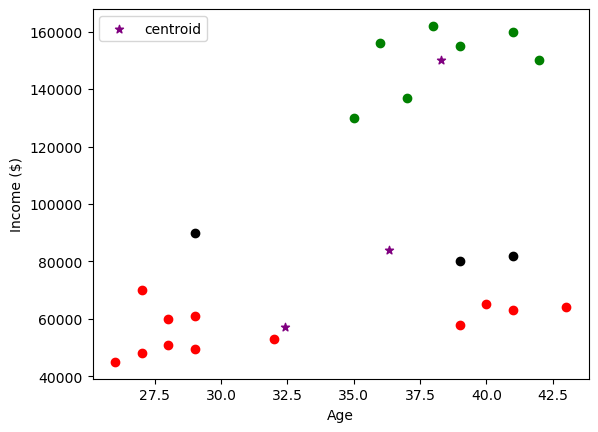

In [13]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [15]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [16]:
df

,Name,Age,Income($),cluter,cluster
0,Rob,0.058824,0.213675,1,1
1,Michael,0.176471,0.384615,2,2
2,Mohan,0.176471,0.136752,1,1
3,Ismail,0.117647,0.128205,1,1
4,Kory,0.941176,0.897436,0,0
5,Gautam,0.764706,0.940171,0,0
6,David,0.882353,0.982906,0,0
7,Andrea,0.705882,1.000000,0,0
8,Brad,0.588235,0.948718,0,0
9,Angelina,0.529412,0.726496,0,0


In [18]:
km = KMeans(n_clusters = 3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [20]:
df['cluster']=y_predicted
df.drop('cluter',axis='columns',inplace=True)
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2
5,Gautam,0.764706,0.940171,2
6,David,0.882353,0.982906,2
7,Andrea,0.705882,1.000000,2
8,Brad,0.588235,0.948718,2
9,Angelina,0.529412,0.726496,2


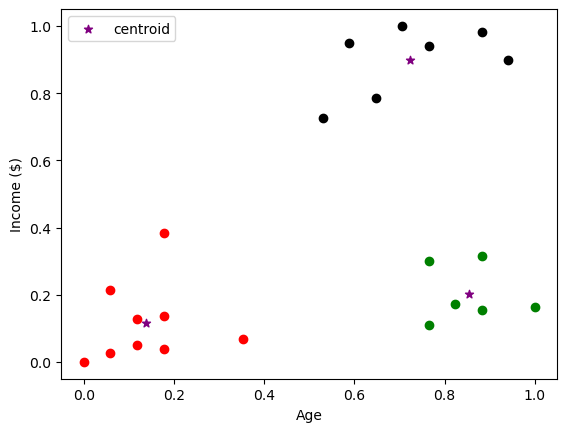

In [21]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [22]:
k_rng = range(1,10)
sse=[]
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_) #.inertia will give you sum sqare error

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

In [23]:
sse

[5.434011511988179,
 2.3456144914725936,
 0.4750783498553096,
 0.34910470944195654,
 0.33284248355621304,
 0.2912552823558453,
 0.2088047968367668,
 0.13706529523670868,
 0.10995816883086573]

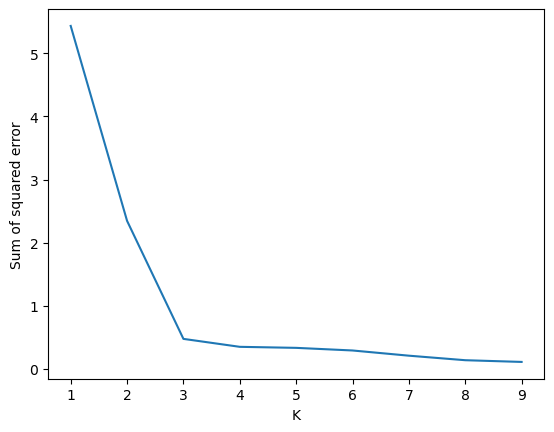

In [24]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)


In [25]:
pip install sweetviz

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/15.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.1 MB ? eta -:--:--
   ---------------------------------------- 0.2/15.1 MB 2.4 MB/s eta 0:00:07
   - -------------------------------------- 0.5/15.1 MB 4.0 MB/s eta 0:00:04
   -- ------------------------------------- 0.8/15.1 MB 5.0 MB/s eta 0:00:03
   --- ------------------------------------ 1.1/15.1 MB 5.6 MB/s eta 0:00:03
   --- ------------------------------------ 1.4/15.1 MB 5.6 MB/s eta 0:00:03
   ---- ----------------------------------- 1.7/15.1 MB 5.6 MB/s eta 0:00:03
   ----- ---------------------------------- 2.1/15.1 MB 6.0 MB/s eta 0:00:03
   ------ --------------------------------- 2.4/15.1 MB 6.0 MB/s eta 0:00:03
   ------- -------------------------------- 2.7/15.1 MB 6.2 MB/s eta 0:00:02
   ------- -------------------------------- 3.0/15.1 MB 6.2 MB/s eta 0:00:02
   ---------